# Introduction

In 1957 the first microscopic theory of superconductivity was published by Bardeen, Cooper, and Schreiffer from the University of Illinois. The BCS theory as it came to be known relied upon the interaction between electrons and phonons in a lattice. When the difference between energy states of the electrons become less than $\hbar \omega$, the phonon energy, a second-order phase transition to a superconducting state occurs. 

The main points of BCS theory that we will investigate are the phase transition at critical temperature $T_{C}$, the Meissner effect, and infinite conductivity associated with the superconducting state.

When a material reaches its critical temperature, it undergoes a second-order phase transition to the superconducting state. While below this critical temperature, the material exhibits zero reistance and infinite conductivity. While in this state, the Meissner effect can be observed. The Meissner effect is a phenomena where all internal magnetic fields are expelled, resulting in zero magnetic flux. The critical field of a superconductor is the magnetic field strength where a material undergoes a transition from superconducting to normal. Some superconductors have two critical fields. 

Superconductors can be grouped into two categories: type-I and type-II. A type-I superconductor only has one critical field. A type-II superconductor has one critical field where below that strength it is a classical superconductor, in which all external magnetic fields are expelled. It also has a second critical temperature where a quantized amount of magnetic flux can penetrate the superconductor. The second critical field is typical a very high value, and is unable to be generated.

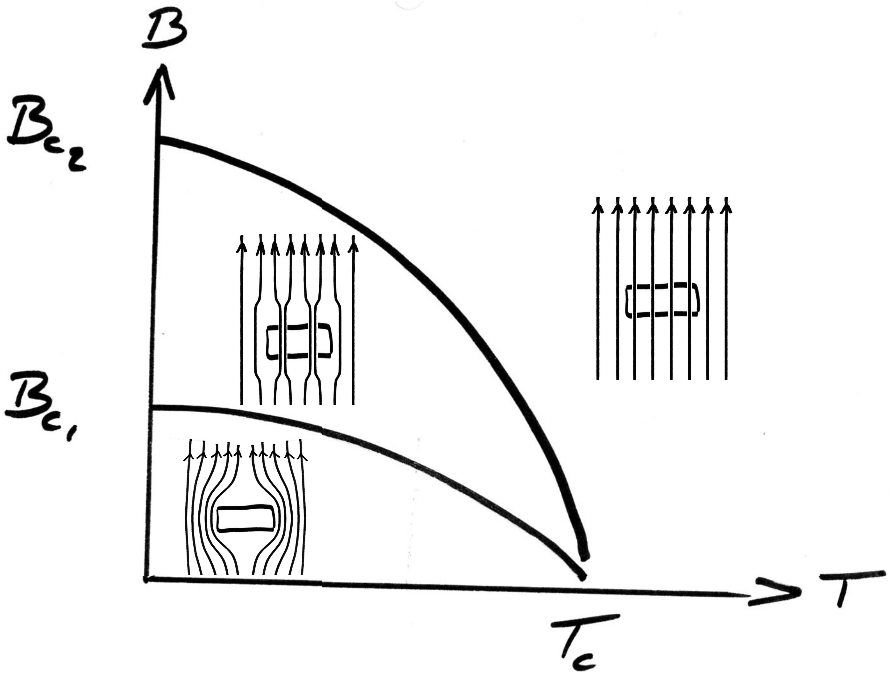

In [35]:
Image(filename='SC_Phase.png')

The material that we will be investigating is a high temperature superconducter yttrium barium copper oxide, or YBCO for short. YBCO is a type-II superconductor. YBCO is the first high temperature superconductor to be discovered; it is classified as such because the critical temperature is above the boiling point of liquid nitrogen. In our investigation of YBCO, we will demonstrate the Meissner effect, and we will measure the critical temperature of YBCO.

# BCS Theory and the Meissner Effect

BCS theory describes the process of Cooper-pairs condensing into boson-like states. A Cooper pair is a pair fermions, such as electrons, bound together at low temperatures. When electrons in the lattice of a superconducting material form cooper pairs, the material enters the superconducting state. 

In 1956, Leon Cooper showed that electrons in a lattice provide a small attractive force on ions in the material. This attractive force brings the electrons of the two ions to have an energy lower than the Fermi energy implying a cooper pairing. 

Cooper pairs need not be adjacent molecules. Cooper pairs can be separated by hundreds of nanometers in a lattice. 

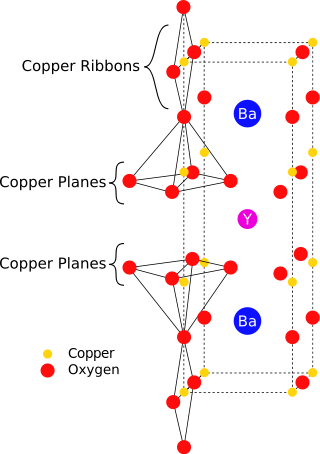

In [57]:
Image(filename='lattice.png')

An observed property of metals in a superconducting state is the expulsion of external magnetic fields as the metal falls below $T_C$. The phenomena was first observed by Walther Meissner and Robert Ochsenfeld in 1933 by measuring the magnetic field outside of tin and lead in their superconducting states. The magnitude of the external field was observed to have increased, thus showing the expulsion of internal magnetic fields. 

The mechanism behind the Meissner effect is explained by the generation of a screening current in the superconductor. This screening current generates a magnetic field that is equal, and opposite in direction and magnitude to the external field. This field generated by the screening current cancels, and expels the external field, thus not allowing the external field to pass through the material. This property of no internal magnetic field makes a superconductor a perfect diamagnet, where magnetic susceptibility, $\chi_{v} = -1$.

A type-II superconductor permits a quantized amount of flux to pass through called fluxons. These fluxons form vertices in the magnetic field that passes through the material. We performed a demonstration of the Meissner effect by submerging the YBCO wafer in liquid nitrogen, and then placing a magnet above the superconductor.

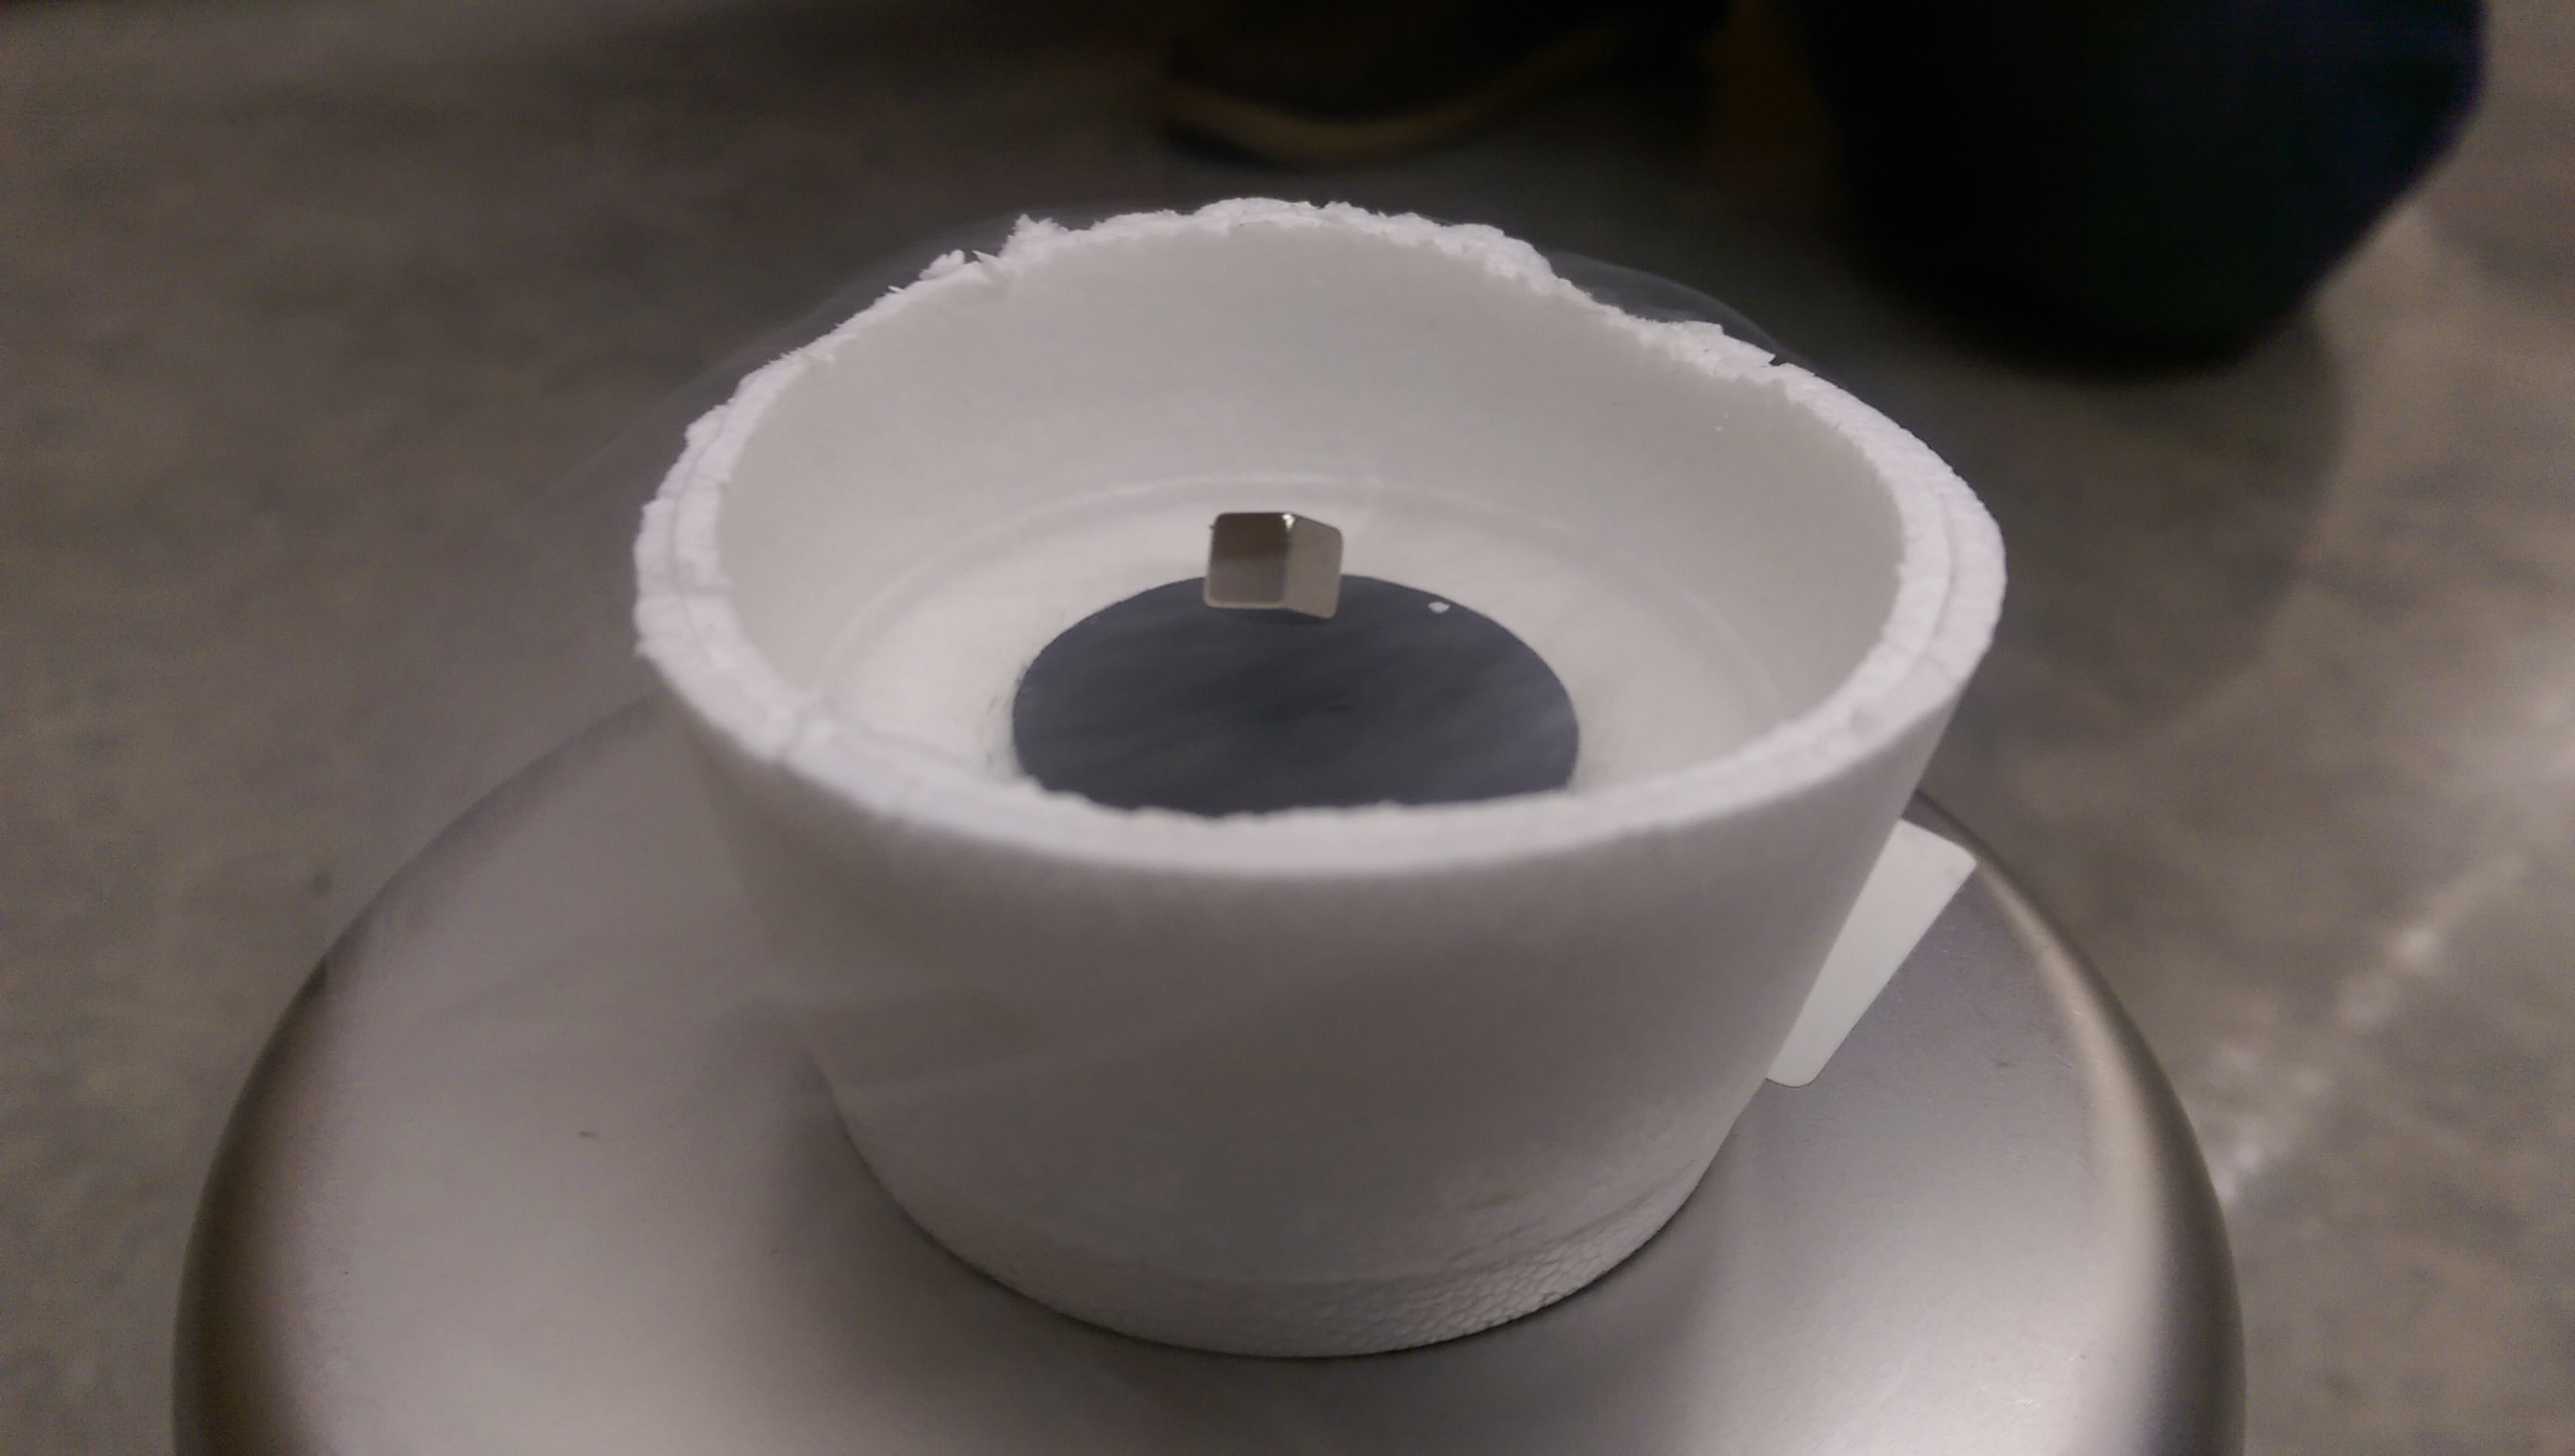

In [58]:
Image(filename='meissner.jpg')

# The Experiment

We will be using a 4-wire impedence measurement configuration to supply a potential and current across the superconductor. 

A 4-wire measurement configuration supplies a potential and current separately to the sample uncer observation. This method is ideal for systems with very little resistance.

We use a 4-wire measurement because a standard two-wire configuration causes a potential drop across the region being measured. We cannot allow that to occur, because then we would not observe our superconductor reaching zero resistance. A 4-wire measurement has almost no current flowing to the measurement device, thus the potential drop introduced is made negligable.

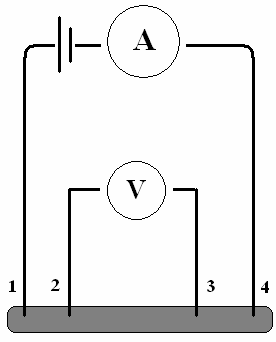

In [40]:
Image(filename='Four-point.png')

The YBCO sample will be connected to a power supply to provide 0.40 amperes of direct current, leads 1 and 4 in the image above. Leads 2 and 3 will be connected to an Agilent multimeter to moniter potential generated across the sample. The thermocouple will be connected to another Agilent multimeter. The thermocouple is a type-T probe capable of measuring temperatures as low as 60 kelvin, which leaves us with more than enough room to include the boiling point of nitrogen. 

The sample will be placed into a container insulated with small silica beads. The insulation is in place to slow down the phase transition so that we can more easily moniter the resistance change as a function of temperature.

The multimeters will interface directly with LabView by means of GPIB input. A LabView protocol was constructed to gather voltage measurements, and plot them against each other. 

To ensure that our system is correctly connected, we monitor the thermocouple voltage at room temperature, and compare to a conversion table for a type-T thermocouple. At room temperature we observe $-0.02$ mV. Cross referencing with the table, this value corresponds to 289 kelvin, which is approximately room temperature.

Next, we slowly fill the container with liquid nitrogen, and moniter the data generated by the LabView program. Once resistance hits zero, we stop pouring the liquid $N_{2}$, and shortly there after end the data acquisition, and move on the processing.

# Critical Temperature of Yttrium Barium Copper Oxide (YBCO)

In [34]:
%matplotlib inline
import numpy as np
from scipy import signal
import matplotlib.pylab as plt
from IPython.display import Image

In [9]:
run_1 = np.genfromtxt('/home/chris/Documents/Phys 120b/YBCO Superconductor/Run 1.txt')
data = np.genfromtxt('/home/chris/Documents/Phys 120b/YBCO Superconductor/Data.txt')

In [53]:
T_1 = run_1[:,0]*-1000.0
V_1 = 1000.*(run_1[:,1])/0.40

Temperature = data[:,0]*1000.
V = 1000.*(data[:,1]*-1)/0.40

y = signal.savgol_filter(V, 5, 2, deriv=2, mode='nearest')
z = signal.savgol_filter(V, 5, 2, deriv=0, mode='nearest')
#y_1 = signal.savgol_filter(V_1, 5, 4, deriv=2)

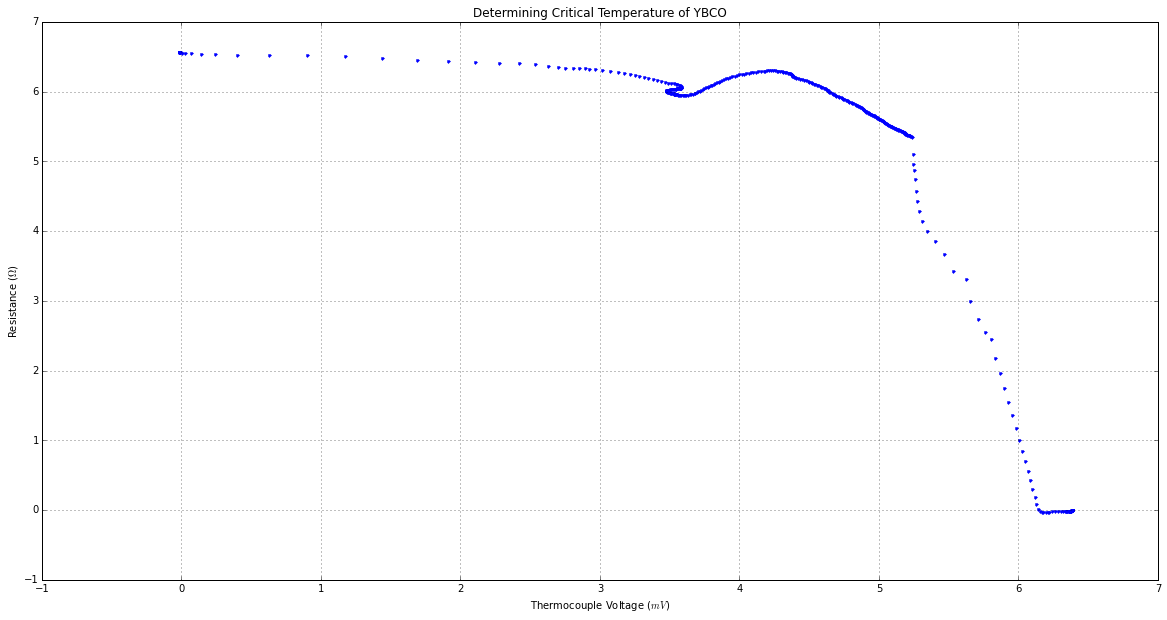

In [60]:
plt.figure(num=1)
plt.figure(figsize=(20, 10))
plt.plot(T_1, V_1, 'b.')
plt.title('Determining Critical Temperature of YBCO')
plt.xlabel('Thermocouple Voltage ($mV$)')
plt.ylabel('Resistance ($\Omega$)')
plt.grid()

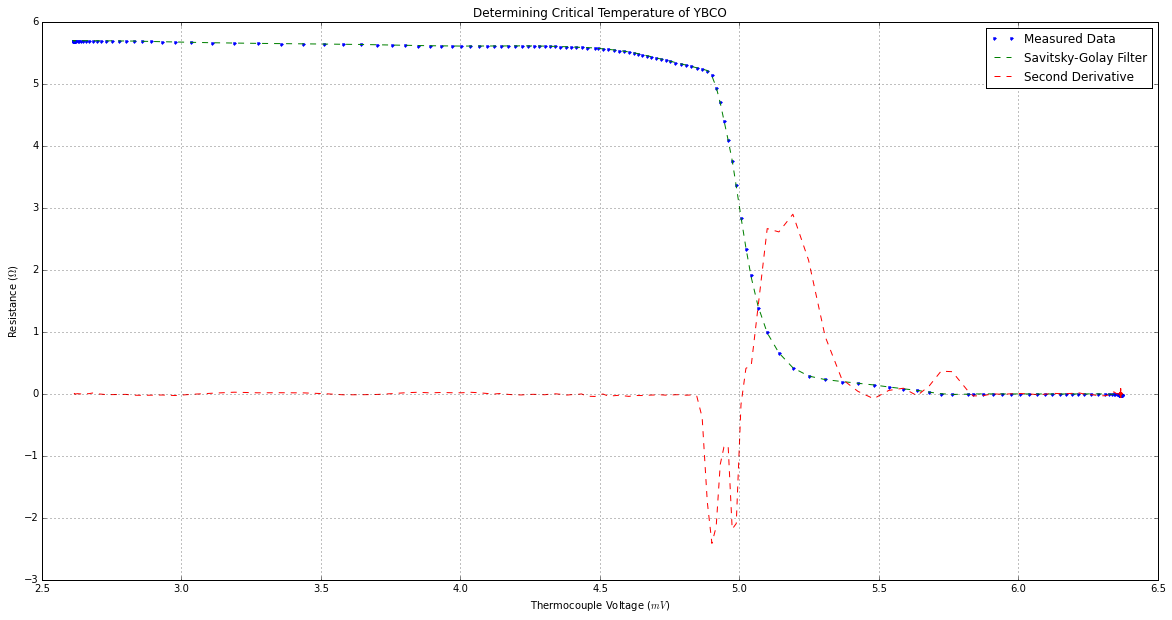

In [59]:
plt.figure(num=2)
plt.figure(figsize=(20, 10))
plt.title('Determining Critical Temperature of YBCO')
plt.plot(Temperature, V, 'b.', Temperature, z, 'g--', Temperature, y*30., 'r--')
plt.legend(['Measured Data', 'Savitsky-Golay Filter', 'Second Derivative'], loc='best')
plt.xlabel('Thermocouple Voltage ($mV$)')
plt.ylabel('Resistance ($\Omega$)')
plt.grid()

The first plot shown above is from the first experiment we performed. Unfortunately, the plot came out a bit distorted before the phase transition occured, making it difficult to actually acquire a value on the critical temperature; but, we do observe the resistance reaching zero at approximately 6 mV, corresponding to 87 kelvin on the table converting thermocouple potential to temperature. This is not far off from known literature values of 93 kelvin. 

The second plot presented is a much smoother, and quicker phase transition. The data is interpolated using a Savitsky-Golay filter to reduce the signal-to-noise ratio. We then take a second derivative of this interpolation to observe regions where the resistance changes most drastically. The first two regions of change show the points where the transition begins, and then eventually slows down. A third peak is observed right at the point where we observe resistance reaching zero. At this point, we observe the thermocouple voltage to be 5.72 mV. Cross referencing with the table to convert thermocouple voltage to temperature, we observe a critical temperature of $T_{C} = 95$ $K$.

The critical field of YBCO could not be measured because the upper bound of the critical field has literature values of 250 tesla, and that large of a field is impossible to generate with modern technology.

# References

[1] J. Bardeen, L. N. Cooper, J. R. Schreiffer; Theory of Superconductivity; Department of Physics, University of Illinois, Urbana, Illinois (1957)

[2] J. Bardeen, L. N. Cooper, and J. R. Schrieffer; Microscopic Theory of Superconductivity; Phys. Rev. 106, 162 – Published 1 April 1957
    
[3] David J.E. Callaway; On the remarkable structure of the superconducting intermediate state, Nuclear Physics B
Volume 344, Issue 3, 19 November 1990, Pages 627–645

[4] M. Tinkham; Resistive Transition of High-Temperature Superconductors; Phys. Rev. Lett. 61, 1658 – Published 3 October 1988

[5] G. Blatter, M. V. Feigel'man, V. B. Geshkenbein, A. I. Larkin, and V. M. Vinokur; Vortices in high-temperature superconductors; Rev. Mod. Phys. 66, 1125 – Published 1 October 1994